In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
df = pd.read_csv('log_returns.csv')
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('Date', axis = 1)
df

,ADANIPORTS.NS,TECHM.NS,BRITANNIA.NS,TCS.NS,SUNPHARMA.NS,INFY.NS,HINDALCO.NS,DRREDDY.NS,HCLTECH.NS,HINDUNILVR.NS,...,ONGC.NS,SBIN.NS,RELIANCE.NS,BAJFINANCE.NS,AXISBANK.NS,HDFCBANK.NS,TATAMOTORS.NS,ICICIBANK.NS,POWERGRID.NS,INDUSINDBK.NS
0,-0.036541,-0.007043,-0.004632,-0.019558,-0.020377,-0.024130,-0.050116,-0.017066,0.000118,0.002856,...,-0.018523,-0.031664,-0.019944,-0.007145,-0.025894,-0.016904,-0.063826,-0.028737,-0.000355,-0.031245
1,-0.008761,0.010594,-0.001987,-0.008757,0.001750,-0.004505,0.022652,0.004782,-0.003731,-0.012947,...,0.015835,-0.013457,0.009848,-0.009062,-0.004458,-0.007595,-0.006919,0.004492,-0.012853,0.001123
2,-0.015370,0.006113,0.011729,0.013808,-0.010738,-0.004386,-0.025132,-0.007978,-0.001662,-0.005795,...,-0.017935,-0.004142,0.026556,0.018076,-0.013262,0.004414,-0.023098,-0.026047,0.002512,0.009259
3,-0.027377,-0.027611,-0.018540,-0.004360,-0.010344,-0.017499,-0.049629,-0.018036,-0.019623,-0.027417,...,-0.047192,-0.034244,-0.018529,-0.000156,-0.051086,-0.010267,-0.063027,-0.013488,-0.010086,-0.019739
4,-0.014803,0.021977,-0.015135,0.011055,0.013119,0.011826,0.003256,0.006297,0.003992,-0.012760,...,0.015541,-0.002867,0.012261,0.033528,0.010815,0.005806,0.028126,-0.006911,0.025381,0.023018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,-0.009138,0.005321,-0.005749,-0.006502,0.001339,-0.005958,-0.035430,0.050604,-0.005528,-0.005973,...,-0.009338,-0.024523,-0.009907,-0.007214,0.003857,-0.025513,-0.023326,0.006349,-0.020260,-0.034712
1000,-0.022011,0.003468,0.002219,0.006662,0.009986,-0.000128,-0.011414,0.000125,-0.004810,-0.000364,...,-0.005559,-0.003485,-0.023370,0.011615,-0.004197,0.008209,-0.034053,-0.016989,-0.013301,-0.013025
1001,0.027504,0.012388,0.010304,-0.013438,-0.006202,0.014927,0.008889,-0.012908,0.012228,0.006578,...,0.008965,0.004275,0.005489,0.047738,-0.002581,0.010289,0.065656,-0.003034,0.010187,0.002786
1002,-0.014054,-0.016046,-0.001090,-0.007804,-0.017934,-0.011462,-0.021985,0.002094,-0.001644,-0.007792,...,-0.017578,-0.018337,-0.024697,-0.012456,-0.005934,-0.007961,-0.009887,0.010578,0.010341,-0.021489


In [3]:
np.random.seed(42)
num_ports = 6000*100
all_weights = np.zeros((num_ports, df.shape[1]))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    if x%6000 == 0:
        print(x)
    # Weights
    weights = np.array(np.random.random(df.shape[1]))
    weights = weights/np.sum(weights)
    # Save weights
    all_weights[x,:] = weights
    # Expected return
    ret_arr[x] = np.sum((df.mean() * weights*252))
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(df.cov()*252, weights)))
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

0
6000
12000
18000
24000
30000
36000
42000
48000
54000
60000
66000
72000
78000
84000
90000
96000
102000
108000
114000
120000
126000
132000
138000
144000
150000
156000
162000
168000
174000
180000
186000
192000
198000
204000
210000
216000
222000
228000
234000
240000
246000
252000
258000
264000
270000
276000
282000
288000
294000
300000
306000
312000
318000
324000
330000
336000
342000
348000
354000
360000
366000
372000
378000
384000
390000
396000
402000
408000
414000
420000
426000
432000
438000
444000
450000
456000
462000
468000
474000
480000
486000
492000
498000
504000
510000
516000
522000
528000
534000
540000
546000
552000
558000
564000
570000
576000
582000
588000
594000


In [4]:
sharpe_arr.max()

1.1364176108997033

In [5]:
p = sharpe_arr.argmax()


In [6]:
print(all_weights[p,:])

[1.03126597e-02 1.94616147e-02 3.49119588e-02 1.56493259e-02
 1.30501423e-02 3.74950719e-02 1.07189485e-03 2.43446019e-02
 2.43809269e-02 4.63044568e-02 7.06716562e-03 2.08537294e-02
 3.05785225e-02 4.30175939e-03 3.97881879e-03 1.64804829e-02
 1.73843193e-02 2.52135949e-02 1.74008150e-02 7.44642454e-03
 3.97722985e-02 4.37907180e-02 2.40419257e-02 1.82971564e-03
 3.09149387e-02 4.05224275e-02 4.06320418e-02 1.48797450e-04
 2.82335003e-03 3.34225753e-02 2.43515307e-03 4.39188067e-02
 4.41411218e-02 5.03872465e-03 4.30005262e-03 3.10165906e-02
 3.27807032e-02 1.00451472e-02 2.84610078e-02 4.95647661e-04
 4.47100406e-02 4.44272119e-02 6.11015787e-03 1.16723194e-02
 6.96014902e-04 3.43925413e-02 1.96844898e-02 8.71943363e-05]


In [7]:
mr = ret_arr[p]
mv = vol_arr[p]

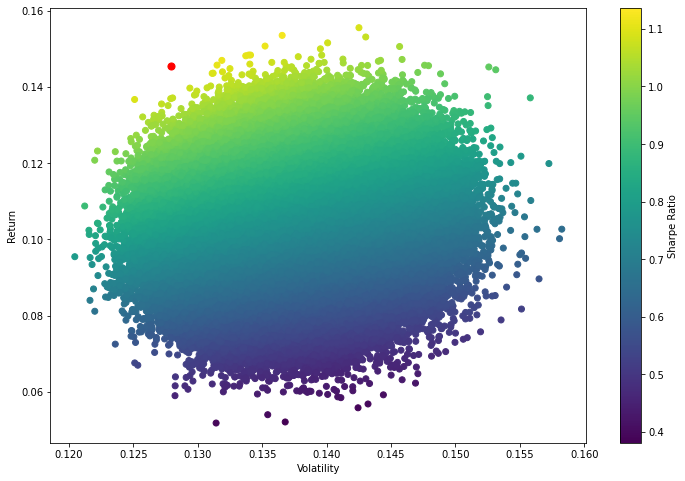

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(mv, mr,c='red', s=50) # red dot

plt.show()

In [9]:
fy = np.linspace(-0.1,0.5,50)

In [10]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(df.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(df.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def min_vol(weights):
    return get_ret_vol_sr(weights)[1]

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [11]:
a = 1/48
c = ((0,1),)
b = []
d = ()
for i in range(48):
    b.append(a)
    d = d+c

In [12]:
fx = []

for i in fy:
    print(i)
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - i})
    
    result = minimize(min_vol, b, method='SLSQP', bounds=d, constraints=cons)
    fx.append(result['fun'])

-0.1
-0.08775510204081634
-0.07551020408163266
-0.06326530612244899
-0.051020408163265314
-0.03877551020408164
-0.026530612244897972
-0.01428571428571429
-0.002040816326530623
0.010204081632653045
0.022448979591836726
0.03469387755102041
0.04693877551020406
0.05918367346938774
0.07142857142857142
0.08367346938775508
0.09591836734693876
0.10816326530612244
0.1204081632653061
0.13265306122448978
0.14489795918367346
0.1571428571428571
0.16938775510204082
0.18163265306122447
0.19387755102040813
0.20612244897959184
0.2183673469387755
0.23061224489795915
0.24285714285714285
0.2551020408163265
0.2673469387755102
0.2795918367346939
0.2918367346938775
0.3040816326530612
0.3163265306122449
0.3285714285714285
0.3408163265306122
0.35306122448979593
0.36530612244897953
0.37755102040816324
0.38979591836734695
0.40204081632653066
0.41428571428571426
0.42653061224489797
0.4387755102040817
0.4510204081632653
0.463265306122449
0.4755102040816327
0.4877551020408163
0.5


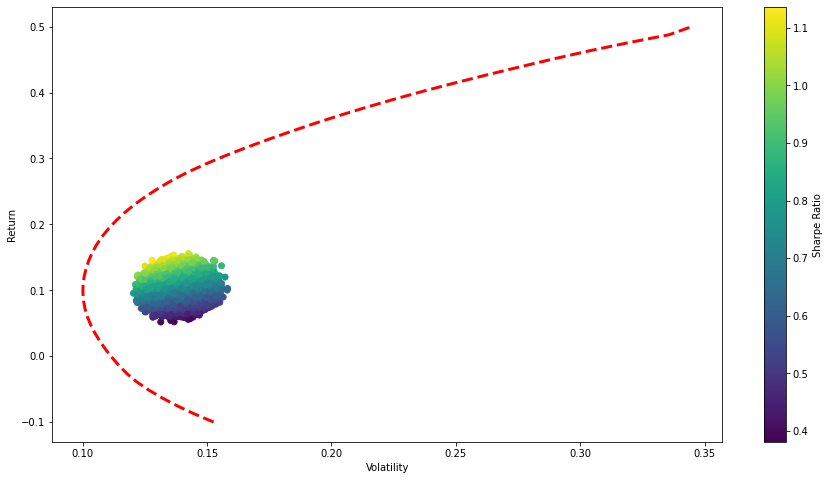

In [18]:
plt.figure(figsize=(15,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(fx,fy, 'r--', linewidth=3)
plt.savefig('cover.png')
plt.show()

In [19]:
all_weights[p,:]

array([1.03126597e-02, 1.94616147e-02, 3.49119588e-02, 1.56493259e-02,
       1.30501423e-02, 3.74950719e-02, 1.07189485e-03, 2.43446019e-02,
       2.43809269e-02, 4.63044568e-02, 7.06716562e-03, 2.08537294e-02,
       3.05785225e-02, 4.30175939e-03, 3.97881879e-03, 1.64804829e-02,
       1.73843193e-02, 2.52135949e-02, 1.74008150e-02, 7.44642454e-03,
       3.97722985e-02, 4.37907180e-02, 2.40419257e-02, 1.82971564e-03,
       3.09149387e-02, 4.05224275e-02, 4.06320418e-02, 1.48797450e-04,
       2.82335003e-03, 3.34225753e-02, 2.43515307e-03, 4.39188067e-02,
       4.41411218e-02, 5.03872465e-03, 4.30005262e-03, 3.10165906e-02,
       3.27807032e-02, 1.00451472e-02, 2.84610078e-02, 4.95647661e-04,
       4.47100406e-02, 4.44272119e-02, 6.11015787e-03, 1.16723194e-02,
       6.96014902e-04, 3.43925413e-02, 1.96844898e-02, 8.71943363e-05])